In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/amazon_prime_titles.csv")

print(df.shape)
df.head()


(9668, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaT,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaT,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaT,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

df.drop_duplicates(inplace=True)

df.isnull().sum()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Unknown,NaT,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",Unknown,NaT,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Unknown,NaT,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",Unknown,NaT,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


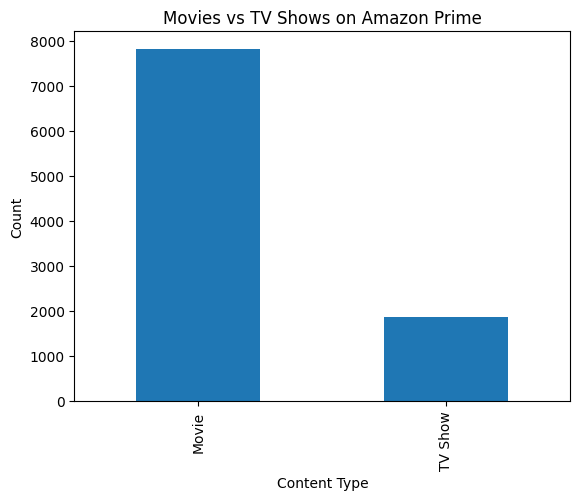

In [6]:
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows on Amazon Prime")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


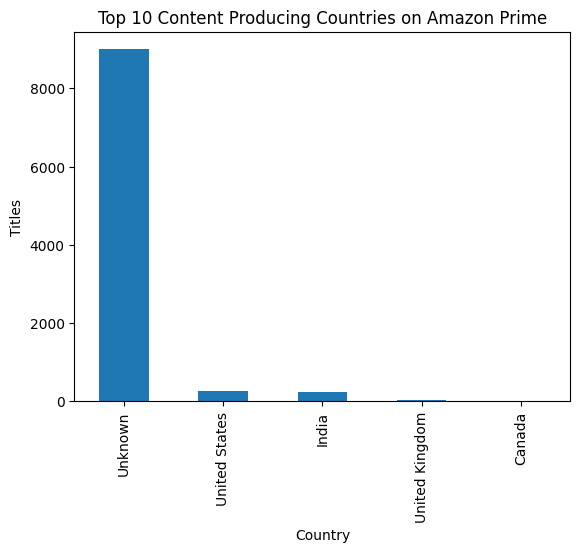

In [10]:
top_countries = df['country'].value_counts().head(5)

top_countries.plot(kind='bar')
plt.title("Top 10 Content Producing Countries on Amazon Prime")
plt.xlabel("Country")
plt.ylabel("Titles")
plt.show()


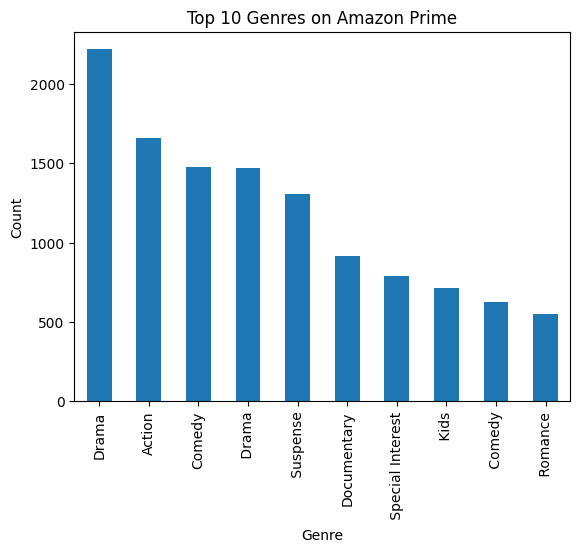

In [11]:
df['listed_in'].str.split(',').explode().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Amazon Prime")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


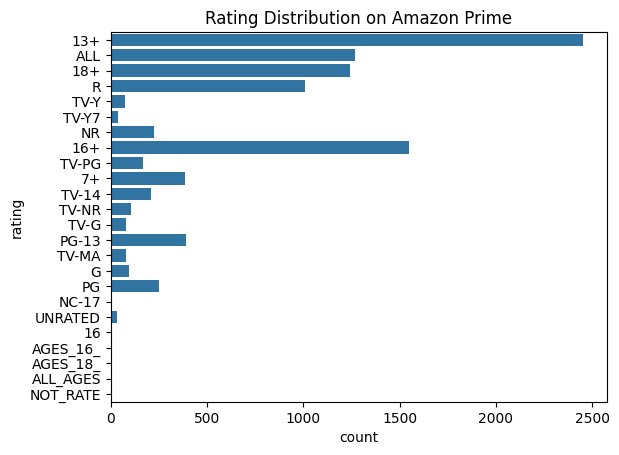

In [13]:
sns.countplot(y=df['rating'])
plt.title("Rating Distribution on Amazon Prime")
plt.show()


In [14]:
print(df.shape)


(9668, 12)


In [15]:
import sqlite3

# create a connection to a database file (stored in Colab environment)
conn = sqlite3.connect("streaming_content.db")

# write dataframe to SQL table
df.to_sql("prime_titles", conn, if_exists="replace", index=False)

print("Table created successfully!")

Table created successfully!


In [16]:
query = "SELECT * FROM prime_titles LIMIT 5;"
pd.read_sql(query, conn)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30 00:00:00,2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30 00:00:00,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30 00:00:00,2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30 00:00:00,2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30 00:00:00,1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [18]:
query = """
SELECT type, COUNT(*) AS count_titles
FROM prime_titles
GROUP BY type;
"""

pd.read_sql(query, conn)


,type,count_titles
0,Movie,7814
1,TV Show,1854


In [19]:
query = """
SELECT country, COUNT(*) AS count_titles
FROM prime_titles
GROUP BY country
ORDER BY count_titles DESC
LIMIT 10;
"""

pd.read_sql(query, conn)


,country,count_titles
0,Unknown,8996
1,United States,253
2,India,229
3,United Kingdom,28
4,Canada,16
5,"United Kingdom, United States",12
6,Spain,8
7,Italy,8
8,"Canada, United States",7
9,"United States, United Kingdom",6


In [20]:
query = """
SELECT rating, COUNT(*) AS count_titles
FROM prime_titles
GROUP BY rating
ORDER BY count_titles DESC;
"""

pd.read_sql(query, conn)


,rating,count_titles
0,13+,2454
1,16+,1547
2,ALL,1268
3,18+,1243
4,R,1010
5,PG-13,393
6,7+,385
7,PG,253
8,NR,223
9,TV-14,208


In [22]:

df['year_added'] = df['date_added'].dt.year
df.to_sql("prime_titles", conn, if_exists="replace", index=False)


9668

In [23]:
query = """
SELECT year_added, COUNT(*) AS count_titles
FROM prime_titles
WHERE year_added IS NOT NULL
GROUP BY year_added
ORDER BY year_added;
"""

pd.read_sql(query, conn)


,year_added,count_titles
0,2021.0,155


In [24]:
query = """
SELECT listed_in, COUNT(*) AS count_titles
FROM prime_titles
GROUP BY listed_in
ORDER BY count_titles DESC
LIMIT 10;
"""

pd.read_sql(query, conn)


,listed_in,count_titles
0,Drama,986
1,Comedy,536
2,"Drama, Suspense",399
3,"Comedy, Drama",377
4,"Animation, Kids",356
5,Documentary,350
6,Kids,334
7,"Action, Drama",297
8,"Documentary, Special Interest",296
9,TV Shows,263


      type  count_titles
0    Movie          7814
1  TV Show          1854


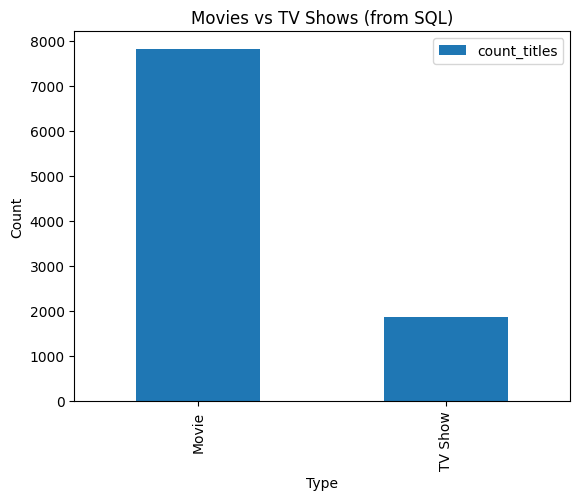

In [25]:
query = """
SELECT type, COUNT(*) AS count_titles
FROM prime_titles
GROUP BY type;
"""

result = pd.read_sql(query, conn)
print(result)

result.plot(kind='bar', x='type', y='count_titles')
plt.title("Movies vs TV Shows (from SQL)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
